<a href="https://colab.research.google.com/github/KwameSegbe/anti-reproductive-rights-crimes/blob/main/Anti_reproductive_right_crimes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Francis Kwame Segbe

# Introduction
In this this Jupyter notebook we seek use exploratory data analysis (EDA) on the the Anti-Reproductive Rights Crimes dataset. The dataset gives us valuable insigts into information about various crimes committed against reproductive health workers whiles performing their duties, Some of these information are the year, month, location type, victim demographics, offense description, and charge type.

# Objective
The main purpose of this project is to use clustering algorithms to uncover paterns in the dataset which were previously hidden.We seek to do this by grouping crime with similar patterns. We also will perfomr some predictive analyses on our dataset as well to predict occurance of a crime and nature of the crime.

# Flow of the project
1. We will start with Data Preprocessing.Prepare our data and make it clean for the task at hand.
-
2. The we will move on to Exploratory Data Analysis. Through this will uncover various patterns and insight to our dataset, we will get to know the distributions and relationship betwen the various variables.
-
3. We will be employing various lustering algorithms such k-means, DBSCAN and Kmode models to identify distinct groupings within our dataset.

In [ ]:
import pandas as pd
import seaborn as sns
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
# Load the dataset
file_path = 'ARRC_2004-2022.csv'
df = pd.read_csv(file_path)

# Display the first few rows to get an overview
df.head()

,ARRC ID,NCIC AGENCY CODE,YEAR,MONTH,LOCATION TYPE,TYPE OF LOSS,VALUE,PROPERTY CATEGORY,QUANTITY,S.RACE,...,V.RACE,V.GENDER,VICTIM TYPE,WEAPON,OFFENSE CODE,CODE TYPE,DESCRIPTION,CHARGE TYPE,BCS CODE,SUMMARY CODE
0,1508,3318,2004,4,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,Hispanic,Female,Individual Client,Handgun,664/187(A),PC,ATTEMPTED MURDER,F,300.0,6.0
1,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Employee,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0
2,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Employee,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0
3,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Other,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0
4,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Other,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0


In [ ]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ARRC ID            131 non-null    int64  
 1   NCIC AGENCY CODE   131 non-null    object 
 2   YEAR               131 non-null    int64  
 3   MONTH              131 non-null    int64  
 4   LOCATION TYPE      131 non-null    object 
 5   TYPE OF LOSS       78 non-null     object 
 6   VALUE              64 non-null     float64
 7   PROPERTY CATEGORY  78 non-null     object 
 8   QUANTITY           75 non-null     float64
 9   S.RACE             130 non-null    object 
 10  S.GENDER           130 non-null    object 
 11  V.RACE             67 non-null     object 
 12  V.GENDER           67 non-null     object 
 13  VICTIM TYPE        131 non-null    object 
 14  WEAPON             41 non-null     object 
 15  OFFENSE CODE       130 non-null    object 
 16  CODE TYPE          130 non

# Data Preprocessing & Cleaning

In [ ]:
# Summary statistics for numerical features
print(df.describe())

            ARRC ID         YEAR       MONTH        VALUE  QUANTITY  \
count  1.310000e+02   131.000000  131.000000     64.00000  75.00000   
mean   5.775145e+05  2012.213740    5.671756   1514.59375   0.96000   
std    3.297816e+06     6.002573    3.141393   6909.00987   0.68655   
min    1.508000e+03  2004.000000    1.000000      0.00000   0.00000   
25%    3.190750e+04  2007.000000    3.000000      0.00000   1.00000   
50%    6.777700e+04  2011.000000    6.000000    100.00000   1.00000   
75%    1.257315e+05  2018.000000    8.000000    500.00000   1.00000   
max    2.203387e+07  2022.000000   12.000000  50000.00000   4.00000   

         BCS CODE  SUMMARY CODE  
count  130.000000    130.000000  
mean   263.084615     32.700000  
std    208.209310     16.222604  
min     56.000000      5.000000  
25%     66.000000     25.000000  
50%    345.000000     30.000000  
75%    399.000000     47.000000  
max    991.000000     76.000000  


In [ ]:
# Checking for missing values
print(df.isnull().sum())

ARRC ID               0
NCIC AGENCY CODE      0
YEAR                  0
MONTH                 0
LOCATION TYPE         0
TYPE OF LOSS         53
VALUE                67
PROPERTY CATEGORY    53
QUANTITY             56
S.RACE                1
S.GENDER              1
V.RACE               64
V.GENDER             64
VICTIM TYPE           0
WEAPON               90
OFFENSE CODE          1
CODE TYPE             1
DESCRIPTION           1
CHARGE TYPE           1
BCS CODE              1
SUMMARY CODE          1
dtype: int64


In [ ]:
df = pd.DataFrame(df)

# Calculate the percentage of missing values for each feature
missing_percentages = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values for each feature:")
print(missing_percentages)

Percentage of missing values for each feature:
ARRC ID               0.000000
NCIC AGENCY CODE      0.000000
YEAR                  0.000000
MONTH                 0.000000
LOCATION TYPE         0.000000
TYPE OF LOSS         40.458015
VALUE                51.145038
PROPERTY CATEGORY    40.458015
QUANTITY             42.748092
S.RACE                0.763359
S.GENDER              0.763359
V.RACE               48.854962
V.GENDER             48.854962
VICTIM TYPE           0.000000
WEAPON               68.702290
OFFENSE CODE          0.763359
CODE TYPE             0.763359
DESCRIPTION           0.763359
CHARGE TYPE           0.763359
BCS CODE              0.763359
SUMMARY CODE          0.763359
dtype: float64


From the above we can see that the only features left are features that very minimal amount of missing variables.
In my next process,  will be checking the informantion section of our dataset to see what further cleaning can be done on our dataset.

In [ ]:
# Here I am trying to take out any column that has more than 25% missing values.
# As we can see TYPE OF LOSS, VALUE, PROPERTY CATEGORY,QUANTITY,V.RACE,V.GENDER,AND WEAPON has way to many missing values.
# I believe doing data imputation will not give right results for the features so I am taking them out.
# Filter features with more than 25% missing values
columns_to_drop = missing_percentages[missing_percentages > 25].index

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Print the filtered DataFrame
print(df.head())

   ARRC ID NCIC AGENCY CODE  YEAR  MONTH                        LOCATION TYPE  \
0     1508             3318  2004      4  Public Reproductive Health Facility   
1     3261             4502  2004      6  Public Reproductive Health Facility   
2     3261             4502  2004      6  Public Reproductive Health Facility   
3     3261             4502  2004      6  Public Reproductive Health Facility   
4     3261             4502  2004      6  Public Reproductive Health Facility   

  S.RACE S.GENDER          VICTIM TYPE OFFENSE CODE CODE TYPE  \
0  White     Male    Individual Client   664/187(A)     PC      
1  White   Female  Individual Employee          422     PC      
2  White   Female  Individual Employee          422     PC      
3  White   Female     Individual Other          422     PC      
4  White   Female     Individual Other          422     PC      

                 DESCRIPTION CHARGE TYPE  BCS CODE  SUMMARY CODE  
0           ATTEMPTED MURDER       F         300.0     

In [ ]:
# After this process what I am trying to do is check for missing values again. This is to confirm if I was able to takeout all the missing variables initially.
df.isnull().sum()

ARRC ID             0
NCIC AGENCY CODE    0
YEAR                0
MONTH               0
LOCATION TYPE       0
S.RACE              1
S.GENDER            1
VICTIM TYPE         0
OFFENSE CODE        1
CODE TYPE           1
DESCRIPTION         1
CHARGE TYPE         1
BCS CODE            1
SUMMARY CODE        1
dtype: int64

In [ ]:
#Checking the information sessions of our dataset for further data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ARRC ID           131 non-null    int64  
 1   NCIC AGENCY CODE  131 non-null    object 
 2   YEAR              131 non-null    int64  
 3   MONTH             131 non-null    int64  
 4   LOCATION TYPE     131 non-null    object 
 5   S.RACE            130 non-null    object 
 6   S.GENDER          130 non-null    object 
 7   VICTIM TYPE       131 non-null    object 
 8   OFFENSE CODE      130 non-null    object 
 9   CODE TYPE         130 non-null    object 
 10  DESCRIPTION       130 non-null    object 
 11  CHARGE TYPE       130 non-null    object 
 12  BCS CODE          130 non-null    float64
 13  SUMMARY CODE      130 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 14.5+ KB


Our data largerly contains categorical data and some few numerical features.
We will be filling the missing variables here.

In [ ]:
#Filling Missing variables for categorical features
# Here I have select features with missing values and computing mode for them. I am doing this for the categorical variables only.

# List of columns to impute with the mode
columns_to_impute = ['S.RACE', 'S.GENDER', 'OFFENSE CODE', 'CHARGE TYPE','CODE TYPE', 'DESCRIPTION']

# Performing a loop through all the categorical variables.
for column in columns_to_impute:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

df[columns_to_impute].head()

,S.RACE,S.GENDER,OFFENSE CODE,CHARGE TYPE,CODE TYPE,DESCRIPTION
0,White,Male,664/187(A),F,PC,ATTEMPTED MURDER
1,White,Female,422,F,PC,THRTN CRIME:INT:TERRORIZE
2,White,Female,422,F,PC,THRTN CRIME:INT:TERRORIZE
3,White,Female,422,F,PC,THRTN CRIME:INT:TERRORIZE
4,White,Female,422,F,PC,THRTN CRIME:INT:TERRORIZE


In [ ]:
# Filling missing variables for numerical features.
# List of numerical columns to impute with the median
numerical_columns_to_impute = ['BCS CODE', 'SUMMARY CODE']

#Performing our loop
for column in numerical_columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

df[numerical_columns_to_impute].head()

,BCS CODE,SUMMARY CODE
0,300.0,6.0
1,345.0,6.0
2,345.0,6.0
3,345.0,6.0
4,345.0,6.0


Our data has been successfully imputed with the modes for each categorical and numerical values.

In [ ]:
#Now lets check again for presence of missing variables
df.isnull().sum()

ARRC ID             0
NCIC AGENCY CODE    0
YEAR                0
MONTH               0
LOCATION TYPE       0
S.RACE              0
S.GENDER            0
VICTIM TYPE         0
OFFENSE CODE        0
CODE TYPE           0
DESCRIPTION         0
CHARGE TYPE         0
BCS CODE            0
SUMMARY CODE        0
dtype: int64

After the imputation, We checked the nulls again and this time around they were no null values.
With this we will perfrom further analysis be grouping offenses into smaller cohorts.

In [ ]:
# To get the unique values in the DESCRIPTION column
unique_descriptions = df['DESCRIPTION'].unique()

# Display the unique values
unique_descriptions

array(['ATTEMPTED MURDER', 'THRTN CRIME:INT:TERRORIZE',
       'VIOLENCE/ETC:REP HLTH SVS', 'VANDALISM:DAMAGE PROPERTY',
       'OFFENSIVE WORDS:PUBLIC PL', 'DUMP WAST:PUB/ETC:COMERCL',
       'THREAT CRIME:INT:TERORIZE', 'ARSON:PROPERTY',
       'DAMAGE PROP:VIO CIVL RGHT', 'POS/ETC ARSON MATERIL/DEV',
       'VANDALISM:DEFACE PROPERTY', 'BATTERY ON PERSON', 'ASSAULT',
       'FALSE BOMB REPORT', 'NONVIOL OBST:REP HLTH SVS',
       'ATT MURDER:PREMEDITATED', 'DAMAGE PROP:REP HLTH SVS',
       'TRESPASS PUBLIC BUSINESS', 'FALSE BOMB/ETC REP:PO/ETC',
       'DAMAGE/ETC POWER LINES', 'USE EXPL DEV TO TERRORIZE',
       'LOCAL ORDINANCE VIOL', 'ANNOYING PHONE CALLS', 'BURGLARY',
       'VANDALISM -$400', 'FALSE BOMB RPRT TO PO',
       'TRSPSS:PSTD LND:RFS TO LV', 'RFUSE GO:OWN REQ:PRIV PRO',
       'VIO CIVIL RGHTS:FRCE/THRT', 'VANDALISM $400 OR MORE',
       'PETTY THEFT', 'ADW NOT FIREARM', 'TRESPAS:DRIV ON PRIV PROP',
       'BURGLARY:SECOND DEGREE', 'VANDALISM', 'ASSAULT AND BATTERY'

We decided to print out the unique values to see how sparse our data will be after encoding. We do have 42 individual offense dscription which will give us a very sparse dataset. In subsequent iterations, we will map the values to 5 distinct  categories depending on their similarities.

In [ ]:
# We are trimming the charge type data as there are some inconsistencies here.
df['CHARGE TYPE'] = df['CHARGE TYPE'].str.strip()

In [ ]:
unique_charge_type = df['CHARGE TYPE'].unique()
unique_charge_type

array(['F', 'M'], dtype=object)

We checked the uniqueness of charge type as well. This feature shows no issues with only types.

In [ ]:
#Checking duplicates in suspect gender column
unique_gender = df['S.GENDER'].unique()
unique_gender

array(['Male', 'Female', 'Unknown', 'M', 'F'], dtype=object)

We could see the gender values seems to be inconsistent in a way. Here we will be making maping the values and grouping similar values into one in our next process.

In [ ]:

# Mapping for S.GENDER
gender_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'M': 'Male',
    'F': 'Female',
    'Unknown': 'Unknown'
}

# Apply the mapping
df['S.GENDER'] = df['S.GENDER'].map(gender_mapping)

In [ ]:


#Rechecking duplcates
unique_gender = df['S.GENDER'].unique()
unique_gender

array(['Male', 'Female', 'Unknown'], dtype=object)

We have a clean feature now to work with after the mapping.

In [ ]:
#Checking duplcates suspect race
unique_race = df['S.RACE'].unique()
unique_race

array(['White', 'Hispanic', 'Unknown', 'Black', 'Other', 'Filipino', 'W'],
      dtype=object)

In [ ]:
# Mapping for S.RACE
race_mapping = {
    'White': 'White',
    'W': 'White',
    'Hispanic': 'Hispanic',
    'Black': 'Black',
    'Other': 'Other',
    'Unknown': 'Unknown',
    'Filipino': 'Filipino'
}

# Apply the mapping
df['S.RACE'] = df['S.RACE'].map(race_mapping)

In [ ]:
#Checking duplcates suspect race
unique_race = df['S.RACE'].unique()
unique_race

array(['White', 'Hispanic', 'Unknown', 'Black', 'Other', 'Filipino'],
      dtype=object)

Suspects race feature also came with some inconsistencies so we had to clean it up and put similar values together.

# Now We have a cleaned dataset to perform some exploration on.

# Understanding the distribution

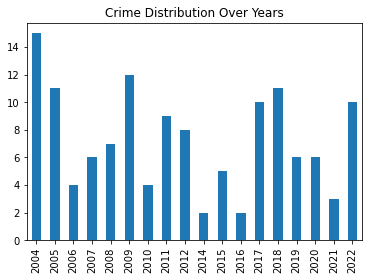

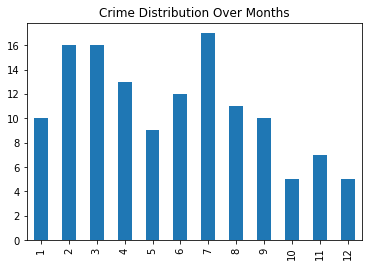

In [ ]:
import matplotlib.pyplot as plt

# Distribution of crimes over the years
df['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Distribution Over Years')
plt.show()

# Distribution of crimes over months
df['MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Distribution Over Months')
plt.show()

Here we have the anti-reproductive rights crime distribution by year and month. This show a not normal distribution.
From these visualization we could see that, from the years distribution, 2004 has the highest anti-reproducive rights crime occurring whiles 2014 and 2015 are in an almost tie recording the lowest crimes.

From the months distribution, we have July having the highest recordings of crimes against reproductive healthcare workers whiles the October recorded the lowest in total.

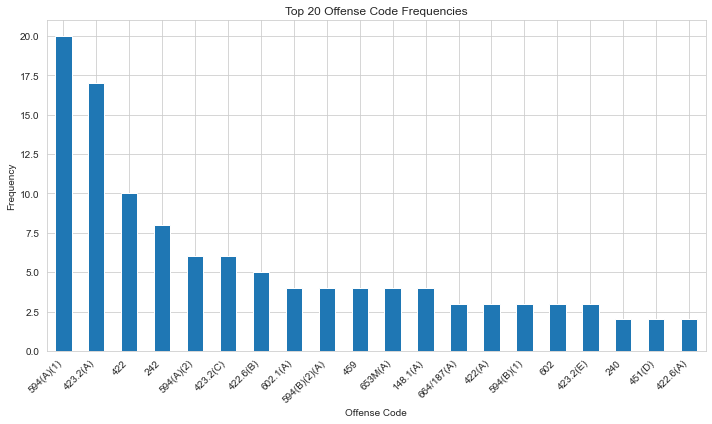

In [ ]:
# Load your data
# df = pd.read_csv('path_to_your_file.csv')  # replace with your file path

# Setting the aesthetics for seaborn
sns.set_style("whitegrid")

# Bar Chart for Offense Code Frequencies
plt.figure(figsize=(10, 6))
offense_code_counts = df['OFFENSE CODE'].value_counts().head(20)  # We limit to top 20 for readability
offense_code_counts.plot(kind='bar')
plt.title('Top 20 Offense Code Frequencies')
plt.xlabel('Offense Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

Our frequency distribution shows us that, offense 594(A)(1) is the most most recorded crime and 422.6(A) is the least recorded crime type.

This individual feature distribution is also positively skewed.

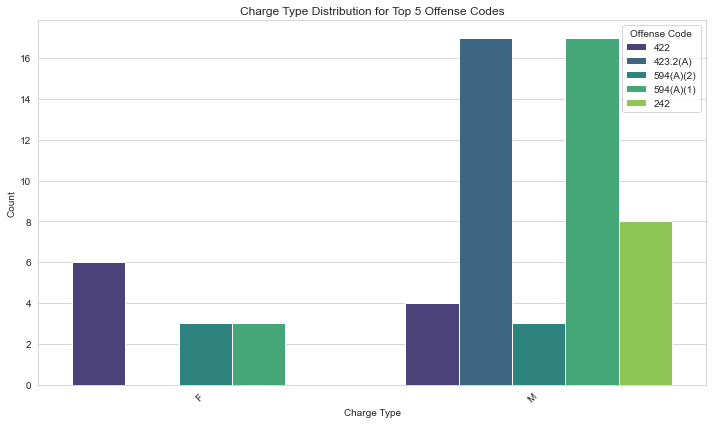

In [ ]:
# Now, let's create a countplot for Charge Types with the hue set to Offense Code
# This can get very crowded because of the many different offense codes, so we'll limit to the top 5 offense codes
top_offense_codes = offense_code_counts.head(5).index
filtered_df = df[df['OFFENSE CODE'].isin(top_offense_codes)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='CHARGE TYPE', hue='OFFENSE CODE', palette='viridis')
plt.title('Charge Type Distribution for Top 5 Offense Codes')
plt.xlabel('Charge Type')
plt.ylabel('Count')
plt.legend(title='Offense Code')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We also checked offense according charge type. Felony chrges seems to be low as compared less serious crimes like Misdemeanor.

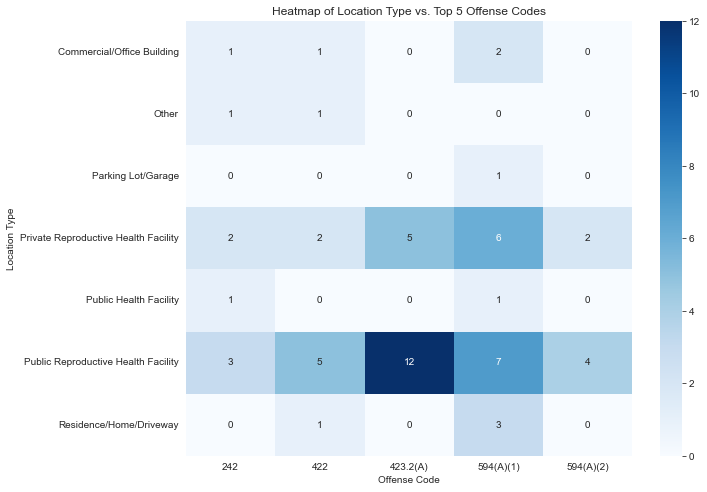

In [ ]:
# Heatmap for Location Type vs Offense Code
# We'll pivot the data to get the counts of offenses for each combination of location type and offense code
# Again, we limit the data to the top 5 offense codes for better visualization
pivot_table = filtered_df.pivot_table(index='LOCATION TYPE', columns='OFFENSE CODE', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='Blues')
plt.title('Heatmap of Location Type vs. Top 5 Offense Codes')
plt.xlabel('Offense Code')
plt.ylabel('Location Type')
plt.show()

We seem to have top offense code 423.2(A) correlating well with Public Reproductive Health Facility. This could suggest that, when ever there is a case involve Public Reproductive Health Facility it is more like to be associated with offense code 423.2(A). These offenses are related to voilence and targeted at individual employees of these facilities.

Offense code 594(A)(1) also has some strong correlation with Public Reproductive Health Facilities and has some correlation with Private Reproductive Health Facilitties. These offense are also related to voilence and targeted at health facilities.


VANDALISM:DEFACE PROPERTY    19
VIOLENCE/ETC:REP HLTH SVS    17
THRTN CRIME:INT:TERRORIZE     8
BATTERY ON PERSON             8
VANDALISM:DAMAGE PROPERTY     6
NONVIOL OBST:REP HLTH SVS     6
FALSE BOMB/ETC REP:PO/ETC     4
TRESPASS PUBLIC BUSINESS      4
THREAT CRIME:INT:TERORIZE     4
DAMAGE PROP:VIO CIVL RGHT     4
ANNOYING PHONE CALLS          4
DAMAGE PROP:REP HLTH SVS      3
TRESPASSING                   3
VANDALISM $400 OR MORE        3
VANDALISM -$400               3
BURGLARY                      3
ATTEMPTED MURDER              2
VANDALISM                     2
VIO CIVIL RGHTS:FRCE/THRT     2
LOCAL ORDINANCE VIOL          2
FALSE BOMB REPORT             2
ARSON:PROPERTY                2
USE EXPL DEV TO TERRORIZE     1
TRESPAS:DRIV ON PRIV PROP     1
OFFENSIVE WORDS:PUBLIC PL     1
ARSON:FOREST LAND             1
THREATN/ETC ELEC OFCL/ETC     1
CRIMINAL THREAT(ASSAULT)      1
ROBBERY                       1
ASSAULT AND BATTERY           1
DUMP WAST:PUB/ETC:COMERCL     1
BURGLARY

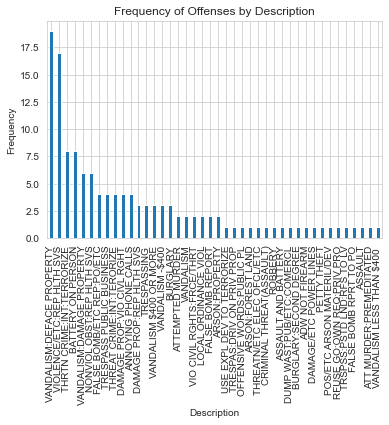

In [ ]:
# Group by 'DESCRIPTION' to see the distribution of offenses
description_counts = df['DESCRIPTION'].value_counts()
print(description_counts)

# For a more detailed analysis, you might want to visualize this distribution
import matplotlib.pyplot as plt
description_counts.plot(kind='bar')
plt.title('Frequency of Offenses by Description')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.show()

Checking offense by descriptions. Vandalism seems to be the top crime against reproductive rights health workers. This crimes looks like it's targeted at the facilities itself and not at the people.

M    94
F    37
Name: CHARGE TYPE, dtype: int64


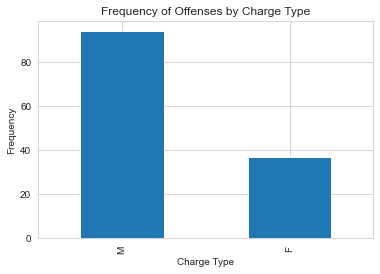

In [ ]:
# Group by 'CHARGE TYPE'
charge_type_counts = df['CHARGE TYPE'].value_counts()
print(charge_type_counts)

# Visualize this
charge_type_counts.plot(kind='bar')
plt.title('Frequency of Offenses by Charge Type')
plt.xlabel('Charge Type')
plt.ylabel('Frequency')
plt.show()

From this groupings we could see that men have committed more crimes compared to women.

2004-02    1
2004-04    4
2004-06    8
2004-07    2
2005-02    1
          ..
2022-03    4
2022-06    1
2022-08    3
2022-09    1
2022-11    1
Name: Year-Month, Length: 83, dtype: int64


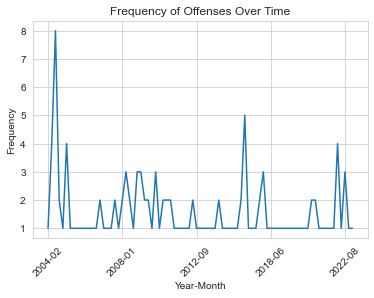

In [ ]:
# Create a 'Year-Month' column for easier grouping
df['Year-Month'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str).str.zfill(2)

# Count offenses by 'Year-Month'
year_month_counts = df['Year-Month'].value_counts().sort_index()
print(year_month_counts)

# Visualize this
year_month_counts.plot(kind='line')
plt.title('Frequency of Offenses Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Offenses against Reproductive health has general reduced from the years of 20004, however; spiked between 2014 and 2015.
Generally the crimes are relatively low with minor spikes in between years.

Public Reproductive Health Facility     68
Private Reproductive Health Facility    40
Commercial/Office Building               8
Residence/Home/Driveway                  5
Other                                    3
Public Health Facility                   3
Parking Lot/Garage                       2
Government/Public Building               1
School/College                           1
Name: LOCATION TYPE, dtype: int64


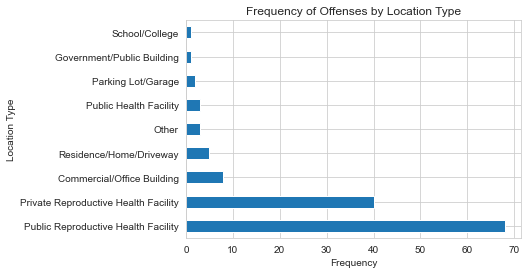

In [ ]:
# Group by 'LOCATION TYPE'
location_counts = df['LOCATION TYPE'].value_counts()
print(location_counts)

# Visualize this
location_counts.plot(kind='barh')
plt.title('Frequency of Offenses by Location Type')
plt.xlabel('Frequency')
plt.ylabel('Location Type')
plt.show()

We also explored Frequency of offense by location type. Public Reproductive health Facilities and Private Reproductive Health Facilities have the most recorded cases. Schools and colleges have the least cases. This could be attributed to better protection from school authorities or more education and sensitization of college students.

Unknown     63
White       54
Hispanic     6
Black        6
Other        1
Filipino     1
Name: S.RACE, dtype: int64
Male       66
Unknown    38
Female     27
Name: S.GENDER, dtype: int64


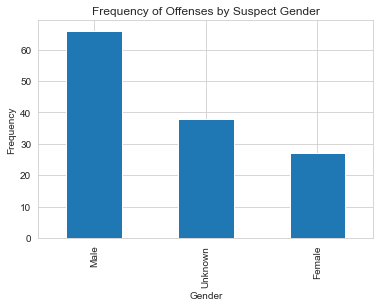

In [ ]:
# Group by 'S.RACE'
race_counts = df['S.RACE'].value_counts()
print(race_counts)

# Group by 'S.GENDER'
gender_counts = df['S.GENDER'].value_counts()
print(gender_counts)

# Visualizing gender distribution
gender_counts.plot(kind='bar')
plt.title('Frequency of Offenses by Suspect Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

From this distribution Male figures are more likely to commit Reproductive Health Right crimes than females.

Health Facility        46
Individual Employee    33
Individual Other       23
Business               17
Individual Client       8
Individual              3
Government              1
Name: VICTIM TYPE, dtype: int64


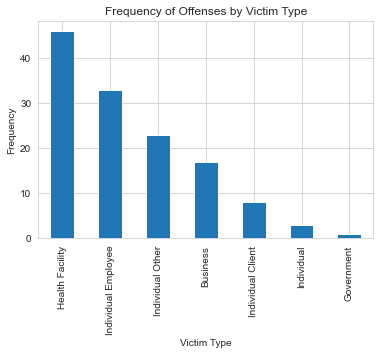

In [ ]:
# Group by 'VICTIM TYPE'
victim_type_counts = df['VICTIM TYPE'].value_counts()
print(victim_type_counts)

# Visualize this
victim_type_counts.plot(kind='bar')
plt.title('Frequency of Offenses by Victim Type')
plt.xlabel('Victim Type')
plt.ylabel('Frequency')
plt.show()

This distribution shows the offenses grouped according victim type. Health Facilities has had the most cases. They are mostly related to act of vandalism and voilence. On the human side of things, Individual Employees of health facilities recorded the most cases. These cases on further investigation as indicated earlier are mostly voilence. The government comes last on this list.

In [ ]:
unique_description_counts = df['DESCRIPTION'].nunique()
print(unique_description_counts)

42


In [ ]:
# Defining the aggregation mapping
aggregation_mapping = {
    'Vandalism': ['VANDALISM:DEFACE PROPERTY', 'VANDALISM:DAMAGE PROPERTY'],
    'Threats': ['THRTN CRIME:INT:TERRORIZE', 'THREAT CRIME:INT:TERORIZE'],
    'Violence': ['BATTERY ON PERSON', 'ATTEMPTED MURDER'],
    'Trespassing': ['TRESPASS PUBLIC BUSINESS', 'TRESPASSING'],
    # More mappings as needed
}

# Function to apply the aggregation
def aggregate_description(description):
    for category, keywords in aggregation_mapping.items():
        if description in keywords:
            return category
    return 'Minor Crime'

# Applying the aggregation
df['Aggregated_Description'] = df['DESCRIPTION'].apply(aggregate_description)

As indicated earlier, We wanted to mapped the values in the features and so that it could help us in building our clustering models. We grouped them into five(5) different categories.

In [ ]:
#We also checked and coverted our YEAR feature into int because it was in object form.
df['YEAR'] = df['YEAR'].astype(str)

In [ ]:
df.head()

,ARRC ID,NCIC AGENCY CODE,YEAR,MONTH,LOCATION TYPE,S.RACE,S.GENDER,VICTIM TYPE,OFFENSE CODE,CODE TYPE,DESCRIPTION,CHARGE TYPE,BCS CODE,SUMMARY CODE,Year-Month,Aggregated_Description
0,1508,3318,2004,4,Public Reproductive Health Facility,White,Male,Individual Client,664/187(A),PC,ATTEMPTED MURDER,F,300.0,6.0,2004-04,Violence
1,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Employee,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats
2,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Employee,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats
3,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Other,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats
4,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Other,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats


In [ ]:
# Aggregated_Description.unique()
unique_aggregated_description= df['Aggregated_Description'].nunique()
print(unique_aggregated_description)

5


This value shows the number of unique values we have left after performing aggregation on our dataset.

In [ ]:
df

,ARRC ID,NCIC AGENCY CODE,YEAR,MONTH,LOCATION TYPE,S.RACE,S.GENDER,VICTIM TYPE,OFFENSE CODE,CODE TYPE,DESCRIPTION,CHARGE TYPE,BCS CODE,SUMMARY CODE,Year-Month,Aggregated_Description
0,1508,3318,2004,4,Public Reproductive Health Facility,White,Male,Individual Client,664/187(A),PC,ATTEMPTED MURDER,F,300.0,6.0,2004-04,Violence
1,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Employee,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats
2,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Employee,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats
3,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Other,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats
4,3261,4502,2004,6,Public Reproductive Health Facility,White,Female,Individual Other,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2004-06,Threats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,157986,1965,2022,6,Public Reproductive Health Facility,Unknown,Male,Business,422(A),PC,THRTN CRIME:INT:TERRORIZE,M,399.0,30.0,2022-06,Threats
127,159891,3019,2022,9,Public Reproductive Health Facility,Unknown,Male,Individual Employee,422(A),PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0,2022-09,Threats
128,22033872,3711,2022,8,Public Health Facility,White,Male,Individual,242,PC,BATTERY ON PERSON,M,397.0,30.0,2022-08,Violence
129,22033872,3711,2022,8,Public Health Facility,White,Female,Individual,594(B)(2)(A),PC,VANDALISM LESS THAN $400,M,66.0,47.0,2022-08,Minor Crime


# FEATURE SELECTION

We went with domain knowledge in our first preminilary selection of features.

In [ ]:
df = df[['OFFENSE CODE', 'CODE TYPE', 'LOCATION TYPE', 'S.RACE', 'S.GENDER', 'VICTIM TYPE', 'CHARGE TYPE', 'BCS CODE', 'SUMMARY CODE','Aggregated_Description']]

In [ ]:
df

,OFFENSE CODE,CODE TYPE,LOCATION TYPE,S.RACE,S.GENDER,VICTIM TYPE,CHARGE TYPE,BCS CODE,SUMMARY CODE,Aggregated_Description
0,664/187(A),PC,Public Reproductive Health Facility,White,Male,Individual Client,F,300.0,6.0,Violence
1,422,PC,Public Reproductive Health Facility,White,Female,Individual Employee,F,345.0,6.0,Threats
2,422,PC,Public Reproductive Health Facility,White,Female,Individual Employee,F,345.0,6.0,Threats
3,422,PC,Public Reproductive Health Facility,White,Female,Individual Other,F,345.0,6.0,Threats
4,422,PC,Public Reproductive Health Facility,White,Female,Individual Other,F,345.0,6.0,Threats
...,...,...,...,...,...,...,...,...,...,...
126,422(A),PC,Public Reproductive Health Facility,Unknown,Male,Business,M,399.0,30.0,Threats
127,422(A),PC,Public Reproductive Health Facility,Unknown,Male,Individual Employee,F,345.0,6.0,Threats
128,242,PC,Public Health Facility,White,Male,Individual,M,397.0,30.0,Violence
129,594(B)(2)(A),PC,Public Health Facility,White,Female,Individual,M,66.0,47.0,Minor Crime


In [ ]:
unique_count_offense = df['OFFENSE CODE'].nunique()
print(unique_count_offense)

36


In [ ]:
df.isna().sum()

OFFENSE CODE              0
CODE TYPE                 0
LOCATION TYPE             0
S.RACE                    0
S.GENDER                  0
VICTIM TYPE               0
CHARGE TYPE               0
BCS CODE                  0
SUMMARY CODE              0
Aggregated_Description    0
dtype: int64

Due computational complexities of using certain features such offense code and description that may arise from natural language processing we have decided to to go with the following features which we believe will still provide a strong basis for clustering offenses under smaller cohorts.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [ ]:
categorical_features = ['CODE TYPE', 'LOCATION TYPE', 'S.RACE', 'S.GENDER', 'VICTIM TYPE', 'CHARGE TYPE','Aggregated_Description']
numerical_features = ['BCS CODE', 'SUMMARY CODE']

In [ ]:
# Defining the encoder and fit-transform the categorical features
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(df[categorical_features])

# Converting encoded features into a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Defining the scaler and fit-transform the numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])

In [ ]:
# Initializing the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit-transform the categorical features and convert the result into a DataFrame
encoded_categorical = onehot_encoder.fit_transform(df[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_features))

#transforming the data
encoded_categorical_df.index = df.index

# Now, let's handle the numerical features
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit-transform the numerical features
scaled_numerical = scaler.fit_transform(df[numerical_features])

# Converting the scaled numerical array back to a DataFrame, with correct column names
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Making sure our dataframe has the same index.
scaled_numerical_df.index = df.index

# Concatenate the encoded categorical and scaled numerical DataFrames along columns
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Here we decided to display the first few rows of the combined DataFrame
print(processed_df.head())

   CODE TYPE_PC  CODE TYPE_PC     CODE TYPE_ZZ     \
0           0.0              1.0              0.0   
1           0.0              1.0              0.0   
2           0.0              1.0              0.0   
3           0.0              1.0              0.0   
4           0.0              1.0              0.0   

   LOCATION TYPE_Commercial/Office Building  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   LOCATION TYPE_Government/Public Building  LOCATION TYPE_Other  \
0                                       0.0                  0.0   
1                                       0.0                  0.0   
2                                       0.0                  0.0   
3                                       0.0                  0.0   
4                                       0.0               

In [ ]:
processed_df

,CODE TYPE_PC,CODE TYPE_PC,CODE TYPE_ZZ,LOCATION TYPE_Commercial/Office Building,LOCATION TYPE_Government/Public Building,LOCATION TYPE_Other,LOCATION TYPE_Parking Lot/Garage,LOCATION TYPE_Private Reproductive Health Facility,LOCATION TYPE_Public Health Facility,LOCATION TYPE_Public Reproductive Health Facility,...,VICTIM TYPE_Individual Other,CHARGE TYPE_F,CHARGE TYPE_M,Aggregated_Description_Minor Crime,Aggregated_Description_Threats,Aggregated_Description_Trespassing,Aggregated_Description_Vandalism,Aggregated_Description_Violence,BCS CODE,SUMMARY CODE
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.175538,-1.657104
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.393206,-1.657104
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.393206,-1.657104
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.393206,-1.657104
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.393206,-1.657104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.654407,-0.166422
127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.393206,-1.657104
128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.644733,-0.166422
129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.956336,0.889479


In [ ]:
df.shape

(131, 10)

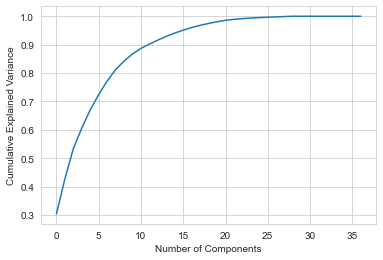

In [ ]:
 # Fit PCA on the entire dataset without specifying n_components
pca = PCA().fit(processed_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
n_components_chosen = 20
pca = PCA(n_components=n_components_chosen)
reduced_data = pca.fit_transform(processed_df)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


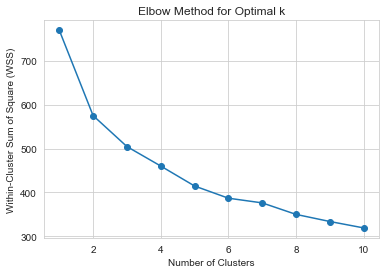

In [ ]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(reduced_data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square (WSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 8  # Example
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(reduced_data)
labels = kmeans_optimal.predict(reduced_data)

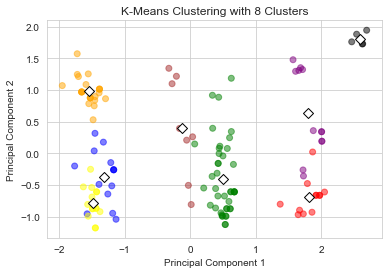

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Custom colors array
colors = np.array(['red', 'blue', 'green', 'yellow', 'orange', 'black', 'purple', 'brown'])

# Map each label to a color
cluster_colors = colors[labels]

# Scatter plot for the reduced data with specified colors for clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_colors, alpha=0.5)

# Calculate the centroids for visualization
centroids = kmeans_optimal.cluster_centers_

# For centroids, you might want to choose a color that stands out, say 'white' or any color not used by clusters
centroid_colors = 'white'  # Example, ensuring centroids are visible against the cluster colors

# Scatter plot for centroids with a distinct color and marker
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=50, color=centroid_colors, edgecolor='black', linewidth=1)

plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Add the cluster labels back to the original dataset
processed_df['Cluster'] = labels

# Examine the features within each cluster
for i in range(8):
    cluster_data = processed_df[processed_df['Cluster'] == i]
    print(f"Cluster {i} feature stats:")
    print(cluster_data.describe(include='all'))  # Summarize statistical data for each cluster

Cluster 0 feature stats:
       CODE TYPE_PC  CODE TYPE_PC     CODE TYPE_ZZ     \
count     12.000000        12.000000             12.0   
mean       0.083333         0.916667              0.0   
std        0.288675         0.288675              0.0   
min        0.000000         0.000000              0.0   
25%        0.000000         1.000000              0.0   
50%        0.000000         1.000000              0.0   
75%        0.000000         1.000000              0.0   
max        1.000000         1.000000              0.0   

       LOCATION TYPE_Commercial/Office Building  \
count                                      12.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

 

# Cluster 0: Serious Offenses in Public Facilities
Focus: Concentration is on felonies, mainly threats and violence, within public reproductive health facilities.
This shows that more violent crimes happens in plubic facilities.
Implication for Decision Makers: Decision makers in resource alocation should prioritize these areas and They should prioritize implementation of threat assessment and management programs, alongside staff training in de-escalation techniques, to mitigate serious offenses.

# Cluster 1: Misdemeanor Incidents in Health Facilities
Focus: This cluster focuses on non-aggressive incidents classified as misdemeanors, These are also primarily in public reproductive health locations.
Implication for Decision Makers: Decision makes should increase preventive measures and staff awareness to address and quickly respond to minor incidents, so that they do not escalate in any further.

# Cluster 2: Mixed Incidents in Reproductive Health Facilities
Focus: A blend of non-violent and violent misdemeanors at health facilities, emphasizing reproductive health.
Implication for Decision Makers: Diversify security and support measures, including both physical security enhancements and mental health support for victims and staff, reflecting the incident range.

# Cluster 3: Trespassing Concerns at Health Facilities
Focus: Issues with security and unauthorized access. This shows the need for better perimeter security and access control measures.
Implication for Decision Makers: Decision makers should make investment in advanced security systems, including surveillance and entry control technologies, and train staff on security protocols.

# Cluster 4: Diverse Incidents, Including Vandalism
Focus: Show a wide range of incidents across health and commercial buildings. The most significant occurrences is act vandalism.
Implication for Decision Makers: Implement comprehensive security strategies that include physical barriers, surveillance, and community engagement to deter vandalism and other crimes.

# Cluster 5: Severe Incidents in Commercial and Health Facilities
Focus: Fairly uniform felony charges indicating grave concerns, This span mainly commercial spaces and health-related facilities.
Implication for Decision Makers: Rapid responses from health officials and implementation of stringent reproductive health laws will help cub this situation.

# Cluster 6: Broad Spectrum of Serious Incidents
Focus: Is a wide range of serious incidents across multiple locations, hinting at complex security challenges.
Implication for Decision Makers: Furhter investigative analysis could be performed to zone in on the specific health  thby conducting thorough risk assessment to tailor responses to specific incident types and locations.

# Cluster 7: Vandalism at Public Reproductive Health Facilities
Focus: Is mainly on serious incidents that involves vandalism in public reproductive health settings.
Implication for Decision Makers: Decision makers should strengthen physical security and engage in community outreach to address misconceptions about reproductive health to reduce hostility towards reproductive health facilities.

In [ ]:
# # Cluster 0
# cluster_0_data = processed_df[processed_df['Cluster'] == 0]
# print(f"Cluster 0 feature stats:")
# print(cluster_0_data.describe())

In [ ]:
# # Cluster 1
# cluster_1_data = processed_df[processed_df['Cluster'] == 1]
# print(f"Cluster 1 feature stats:")
# print(cluster_1_data.describe())

In [ ]:
# # Cluster 2
# cluster_2_data = processed_df[processed_df['Cluster'] == 2]
# print(f"Cluster 2 feature stats:")
# print(cluster_2_data.describe())

In [ ]:
# # Cluster 3
# cluster_3_data = processed_df[processed_df['Cluster'] == 3]
# print(f"Cluster 3 feature stats:")
# print(cluster_3_data.describe())

In [ ]:
# # Cluster 4
# cluster_4_data = processed_df[processed_df['Cluster'] == 4]
# print(f"Cluster 4 feature stats:")
# print(cluster_4_data.describe())

In [ ]:
# # Cluster 5
# cluster_5_data = processed_df[processed_df['Cluster'] == 5]
# print(f"Cluster 5 feature stats:")
# print(cluster_5_data.describe())

In [ ]:
# # Cluster 6
# cluster_6_data = processed_df[processed_df['Cluster'] == 6]
# print(f"Cluster 6 feature stats:")
# print(cluster_6_data.describe())

In [ ]:
# # Cluster 7
# cluster_7_data = processed_df[processed_df['Cluster'] == 7]
# print(f"Cluster 7 feature stats:")
# print(cluster_7_data.describe())

In [ ]:
!pip install kmodes

In [ ]:
df

,OFFENSE CODE,CODE TYPE,LOCATION TYPE,S.RACE,S.GENDER,VICTIM TYPE,CHARGE TYPE,BCS CODE,SUMMARY CODE,Aggregated_Description
0,664/187(A),PC,Public Reproductive Health Facility,White,Male,Individual Client,F,300.0,6.0,Violence
1,422,PC,Public Reproductive Health Facility,White,Female,Individual Employee,F,345.0,6.0,Threats
2,422,PC,Public Reproductive Health Facility,White,Female,Individual Employee,F,345.0,6.0,Threats
3,422,PC,Public Reproductive Health Facility,White,Female,Individual Other,F,345.0,6.0,Threats
4,422,PC,Public Reproductive Health Facility,White,Female,Individual Other,F,345.0,6.0,Threats
...,...,...,...,...,...,...,...,...,...,...
126,422(A),PC,Public Reproductive Health Facility,Unknown,Male,Business,M,399.0,30.0,Threats
127,422(A),PC,Public Reproductive Health Facility,Unknown,Male,Individual Employee,F,345.0,6.0,Threats
128,242,PC,Public Health Facility,White,Male,Individual,M,397.0,30.0,Violence
129,594(B)(2)(A),PC,Public Health Facility,White,Female,Individual,M,66.0,47.0,Minor Crime


# Clustering Using Kmodes
We decided to use this as it is most suitable for clustering categorical data.
Instead of calculating similarity using means as is done by kmeans, Kmodes calculate disimilarity using modes to do clustering. This is because categorical variables to do actually have meaningful distances between them, hence our decision to settle on Kmodes as a vaible clustering method.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 313.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 20, cost: 267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, 

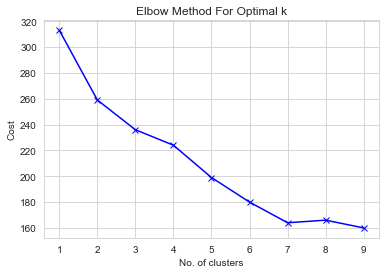

In [ ]:
# Selecting the relevant categorical features
categorical_features = ['LOCATION TYPE', 'VICTIM TYPE', 'OFFENSE CODE', 'Aggregated_Description']
df = df[categorical_features]

# Data Preparation: Handling any missing values or data cleaning steps as necessary
# For simplicity, assuming df is already clean

# Determining the Optimal Number of Clusters
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 178.0
Run 1, iteration: 2/100, moves: 8, cost: 178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 26, cost: 211.0
Run 2, iteration: 2/100, moves: 9, cost: 211.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 40, cost: 198.0
Run 3, iteration: 2/100, moves: 7, cost: 198.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15, cost: 175.0
Run 4, iteration: 2/100, moves: 4, cost: 173.0
Run 4, iteration: 3/100, moves: 1, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 18, cost: 216.0
Best run was number 4


array([4, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 3, 1, 1, 2, 0, 0, 0, 1, 5, 4, 5,
       0, 0, 0, 5, 3, 1, 0, 5, 5, 0, 3, 0, 0, 0, 5, 1, 1, 1, 1, 1, 5, 0,
       0, 0, 0, 0, 2, 2, 3, 2, 2, 1, 1, 0, 1, 3, 3, 3, 3, 3, 0, 0, 1, 1,
       2, 3, 5, 0, 3, 1, 0, 0, 0, 1, 5, 3, 0, 0, 0, 0, 5, 1, 5, 1, 5, 5,
       5, 5, 5, 5, 4, 0, 0, 0, 0, 0, 3, 1, 4, 1, 1, 4, 5, 1, 1, 1, 1, 0,
       1, 0, 0, 4, 5, 5, 1, 4, 4, 1, 4, 0, 0, 1, 1, 1, 2, 2, 4, 0, 5],
      dtype=uint16)

In [ ]:
optimal_k = 6

# Clustering with Optimal k
km = KModes(n_clusters=optimal_k, init='Cao', n_init=5, random_state=42)
clusters = km.fit_predict(df)

# Adding the cluster labels to the dataset
df['Cluster'] = clusters

# Cluster Analysis: Examining the Modes of Each Cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_modes = df[df['Cluster'] == i].mode().iloc[0]
    print(cluster_modes)


Cluster 0:
LOCATION TYPE             Public Reproductive Health Facility
VICTIM TYPE                                   Health Facility
OFFENSE CODE                                        594(A)(1)
Aggregated_Description                            Minor Crime
Cluster                                                     0
Name: 0, dtype: object

Cluster 1:
LOCATION TYPE             Private Reproductive Health Facility
VICTIM TYPE                                Individual Employee
OFFENSE CODE                                          423.2(A)
Aggregated_Description                             Minor Crime
Cluster                                                      1
Name: 0, dtype: object

Cluster 2:
LOCATION TYPE             Public Reproductive Health Facility
VICTIM TYPE                                  Individual Other
OFFENSE CODE                                              242
Aggregated_Description                            Minor Crime
Cluster                                      

C:\Users\HP\AppData\Local\Temp\ipykernel_29868\227841448.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


In [ ]:
df.insert(0, "Cluster", clusters, True)
kmode_clusters = df
kmode_clusters

,Cluster,LOCATION TYPE,VICTIM TYPE,OFFENSE CODE,Aggregated_Description,Cluster
0,0,Public Reproductive Health Facility,Individual Client,664/187(A),Violence,0
1,3,Public Reproductive Health Facility,Individual Employee,422,Threats,3
2,3,Public Reproductive Health Facility,Individual Employee,422,Threats,3
3,3,Public Reproductive Health Facility,Individual Other,422,Threats,3
4,3,Public Reproductive Health Facility,Individual Other,422,Threats,3
...,...,...,...,...,...,...
126,3,Public Reproductive Health Facility,Business,422(A),Threats,3
127,3,Public Reproductive Health Facility,Individual Employee,422(A),Threats,3
128,2,Public Health Facility,Individual,242,Violence,2
129,0,Public Health Facility,Individual,594(B)(2)(A),Minor Crime,0


# Cluster 0: Public Reproductive Health Facilities Facing Other Offenses
Focus: This cluster shows public reproductive health facilities that are frequently targeted with miscellaneous offenses.
Implication for Decision Makers: Beef up on-site security and develop specialized training for staff to handle various types of incidents, reflecting the diverse nature of threats faced.

# Cluster 1: Private Facilities and Employee Targets
Focus: Employees at private reproductive health facilities are at risk, with a prevalence of specific legal violations.
Implication for Decision Makers: They law enforcement agencies should Implement robust safety measures, including legal education and personal safety training for employees, and state department should also advocate for stricter legal protections.

# Cluster 2: Public Facilities and Violence Against Individuals
Focus: In this cluster we could see that most the cluster heavily focused on Public facilities where individuals face physical violence. There are some non violence crimes as well.

# Cluster 3: Public Facilities with Employee Victims of Threats
Focus: Employees at public facilities are particularly targeted by threats.
Implication for Decision Makers: Developing a comprehensive support systems for staff would help, this should include psychological support and training on threat identification and response. This will  mitigate the impact of threats.

# Cluster 4: Public Facilities with Other Offenses Against Employees
Focus: A range of offenses targeting employees at public reproductive health facilities. These are all other minor offenses recorded that are targeted at public health facilities.

# Cluster 5: Private Facilities with Vandalism
Focus: Vandalism at private reproductive health facilities, impacting the health facility itself.
Implication for Decision Makers: Implement physical security improvements and surveillance systems to deter and document acts of vandalism, coupled with community outreach to reduce hostility.

In [ ]:
# df.to_csv('C:\\Users\\HP\\Downloads\\kmode_clusters.csv', index=False)

# USING DBSCAN

In [ ]:
# Instantiate DBSCAN with an appropriate eps value for the binary space and Hamming distance
# min_samples is usually set to a low number for small or sparsely distributed datasets

db = DBSCAN(eps=0.5, min_samples=5, metric='hamming')
clusters = db.fit_predict(processed_df)

In [ ]:
# Add the cluster assignments back to the original DataFrame
processed_df['DBSCAN_Clusters'] = clusters

# Output some of the results
print(processed_df['DBSCAN_Clusters'].value_counts())
print(processed_df.head())

0    131
Name: DBSCAN_Clusters, dtype: int64
   CODE TYPE_PC  CODE TYPE_PC     CODE TYPE_ZZ     \
0           0.0              1.0              0.0   
1           0.0              1.0              0.0   
2           0.0              1.0              0.0   
3           0.0              1.0              0.0   
4           0.0              1.0              0.0   

   LOCATION TYPE_Commercial/Office Building  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   LOCATION TYPE_Government/Public Building  LOCATION TYPE_Other  \
0                                       0.0                  0.0   
1                                       0.0                  0.0   
2                                       0.0                  0.0   
3                                       0.0                  0.0   
4            

In [ ]:
# Selecting only the two features of interest
data = df[['OFFENSE CODE', 'LOCATION TYPE']]

# Initializing and fitting the k-modes model
km = KModes(n_clusters=8, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# Adding the cluster labels to the dataset for analysis
data['Cluster'] = clusters

# Display the count of each category within each cluster for analysis
cluster_summary = data.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 113.0
Run 1, iteration: 2/100, moves: 3, cost: 113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14, cost: 104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 33, cost: 100.0
Run 4, iteration: 2/100, moves: 1, cost: 100.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 99.0
Best run was number 5


C:\Users\HP\AppData\Local\Temp\ipykernel_29868\3944176257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


In [ ]:
cluster_summary

,OFFENSE CODE,LOCATION TYPE
Cluster,,
0,594(A)(1),Private Reproductive Health Facility
1,423.2(A),Public Reproductive Health Facility
2,148.1(A),Commercial/Office Building
3,594(B)(1),Private Reproductive Health Facility
4,594(A)(1),Residence/Home/Driveway
5,594(A)(1),Public Reproductive Health Facility
6,423.2(A),Private Reproductive Health Facility
7,602.1(A),Private Reproductive Health Facility


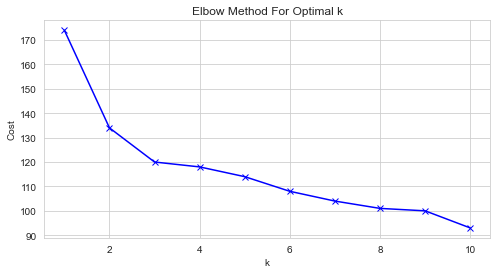

In [ ]:
costs = []
K = range(1, 11)

for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km = km.fit(df[['OFFENSE CODE', 'LOCATION TYPE']])  # Adjust based on selected features
    costs.append(km.cost_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, costs, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Selecting only the two features of interest
data1 = df[['OFFENSE CODE', 'Aggregated_Description']]

# Initializing and fitting the k-modes model
km = KModes(n_clusters=8, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# Adding the cluster labels to the dataset for analysis
data1['Cluster'] = clusters

# Display the count of each category within each cluster for analysis
cluster_summary1 = data1.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 14, cost: 118.0
Run 3, iteration: 2/100, moves: 1, cost: 118.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7, cost: 106.0
Run 4, iteration: 2/100, moves: 0, cost: 106.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17, cost: 125.0
Run 5, iteration: 2/100, moves: 1, cost: 125.0
Best run was number 4


C:\Users\HP\AppData\Local\Temp\ipykernel_29868\3684279751.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster'] = clusters


In [ ]:
cluster_summary1

,OFFENSE CODE,Aggregated_Description
Cluster,,
0,594(A)(1),Vandalism
1,422,Minor Crime
2,594(A)(1),Minor Crime
3,423.2(A),Minor Crime
4,148.1(A),Minor Crime
5,423.2(A),Minor Crime
6,242,Violence
7,423.2(C),Minor Crime


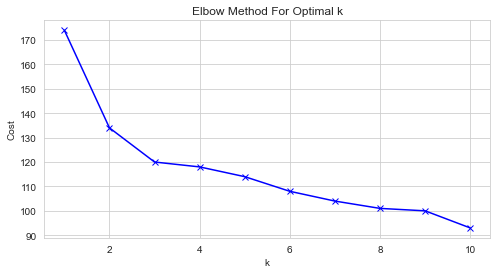

In [ ]:
costs1 = []
K = range(1, 11)  # Example range, adjust based on your dataset size and diversity

for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km = km.fit(df[['OFFENSE CODE', 'Aggregated_Description']])  # Adjust based on selected features
    costs1.append(km.cost_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, costs, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Key Findings and Implementation Considerations

Our findings suggest that clustering showed a lot of meaningful insights, From various clustering algorithms and different pairs of clustering we explored, the clustering of offenses ranges between 6 and 8 distinct clusters. Importantly, these clusters revealed meaningful distinctions in the types of locations where offenses took place, the nature of the victims involved, and the severity or specific type of offense committed, among other relevant factors.

# Conclusion and Recommended Approach

The clustering analysis shows the importance of a nuanced approach to understanding and addressing offenses. Specifically, the findings indicate that a categorization into 6 to 8 clusters offers a much more meaningful and actionable framework based on the explored features weather in pairs and collectively. This outcome shows the potential benefits of inforcing targeted interventions and strategies that are made for the specific context and characteristics of each offense category. By adopting such data-driven approaches, response strategies, resource allocation, and policy development efforts can be significantly enhanced in terms of effectiveness and real-world impact.